In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import os
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np

In [5]:
BATCH_SIZE = 64

train_generator = ImageDataGenerator(rotation_range=90,
                                     brightness_range=[0.1, 0.7],
                                     width_shift_range=0.5,
                                     height_shift_range=0.5,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     validation_split=0.15,
                                     preprocessing_function=preprocess_input) # VGG16 preprocessing

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input) # VGG16 preprocessing

In [5]:
pip install split-folders

In [6]:
import splitfolders

In [7]:
input_file = '/content/drive/MyDrive/Colab Notebooks/data'
output_file = '/content/drive/MyDrive/Colab Notebooks/data splitted'

In [8]:
splitfolders.ratio(input_file, output=output_file, seed=38, ratio=(.75, .25), group_prefix=None)

Copying files: 4198 files [02:14, 31.13 files/s]


In [9]:
train_path = '/content/drive/MyDrive/Colab Notebooks/data splitted/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/data splitted/val'

In [14]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [16]:
IMAGE_SIZE = [224, 224]


In [17]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


58889256/58889256 [==============================] - 3s 0us/step


In [19]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [20]:
for layer in vgg.layers:
  layer.trainable = False

In [21]:
folders = glob('/content/drive/MyDrive/Colab Notebooks/data splitted/train/*')
print(len(folders))

4


In [22]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [23]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [24]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [25]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [26]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 3147 images belonging to 4 classes.


In [27]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 1051 images belonging to 4 classes.


In [29]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5',
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=6,
  steps_per_epoch=2,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

<ipython-input-29-39ab242bda09>:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(


Epoch 1/6

Epoch 1: val_loss improved from inf to 2.18149, saving model to mymodel.h5
2/2 - 729s - loss: 2.1199 - accuracy: 0.6250 - val_loss: 2.1815 - val_accuracy: 0.7451 - 729s/epoch - 365s/step
Epoch 2/6


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 2.18149 to 1.39854, saving model to mymodel.h5
2/2 - 785s - loss: 1.9547 - accuracy: 0.7656 - val_loss: 1.3985 - val_accuracy: 0.7930 - 785s/epoch - 393s/step
Epoch 3/6

Epoch 3: val_loss improved from 1.39854 to 1.29106, saving model to mymodel.h5
2/2 - 727s - loss: 1.1486 - accuracy: 0.8281 - val_loss: 1.2911 - val_accuracy: 0.7900 - 727s/epoch - 364s/step
Epoch 4/6

Epoch 4: val_loss did not improve from 1.29106
2/2 - 724s - loss: 1.6665 - accuracy: 0.7188 - val_loss: 1.5044 - val_accuracy: 0.7441 - 724s/epoch - 362s/step
Epoch 5/6

Epoch 5: val_loss did not improve from 1.29106
2/2 - 725s - loss: 1.6461 - accuracy: 0.7188 - val_loss: 1.5063 - val_accuracy: 0.7432 - 725s/epoch - 362s/step
Epoch 6/6

Epoch 6: val_loss improved from 1.29106 to 0.95371, saving model to mymodel.h5
2/2 - 696s - loss: 1.7592 - accuracy: 0.6719 - val_loss: 0.9537 - val_accuracy: 0.8154 - 696s/epoch - 348s/step
Training completed in time:  1:14:26.527163


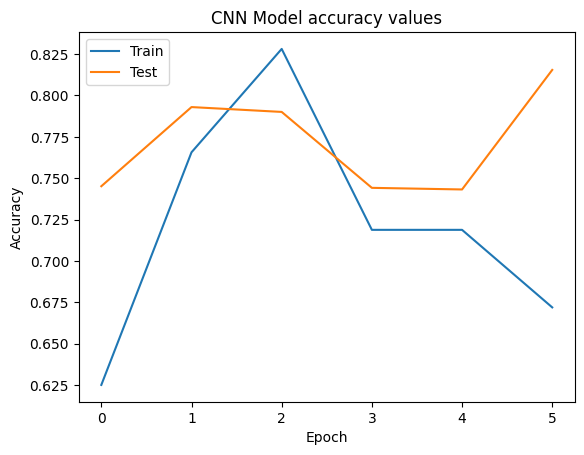

In [30]:
 _# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# New Section